# Mall Custumers Clustering Using Clustering Algorithms

Author- RITIKA ROY CHOWDHURY

## Problem Statement 

Classify Mall Customers according to there Gender, Age, Annual Income and Spending

### Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
df=pd.read_csv('Downloads/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Understand Dataset

In [3]:
df.shape

(200, 5)

In [4]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Missing Values

In [7]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Duplicate rows

In [8]:
df.duplicated().sum()

0

### Statistical Information

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Exploratory Data Analysis

### 1. Analyze Genre/Gender

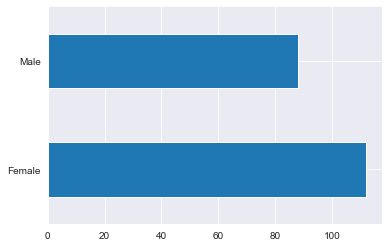

In [10]:
df['Genre'].value_counts().plot(kind='barh');

Count of Female customer is higher than male customer

### 2. Analyze Age

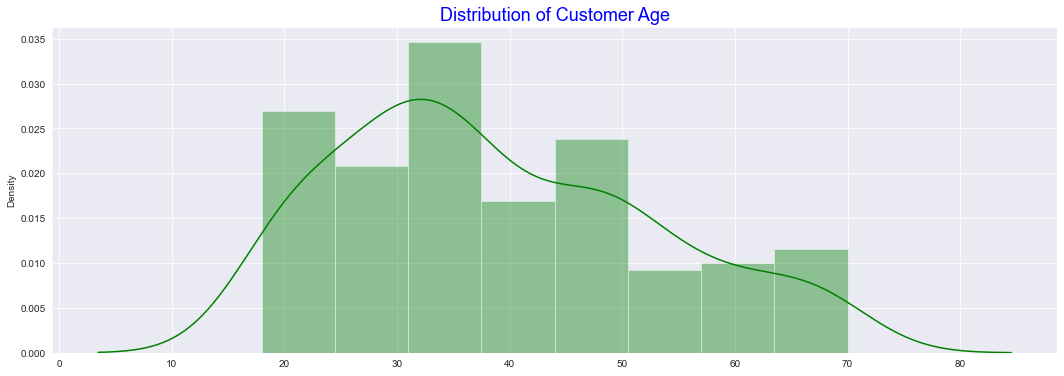

In [11]:
plt.figure(figsize=(18,6))
sns.distplot(x=df['Age'], color='green')
plt.title("Distribution of Customer Age", fontsize=18, color='blue');

Count of Customers in age group 20 to 50 is high.

### 3. Analyze Annual Income

In [12]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

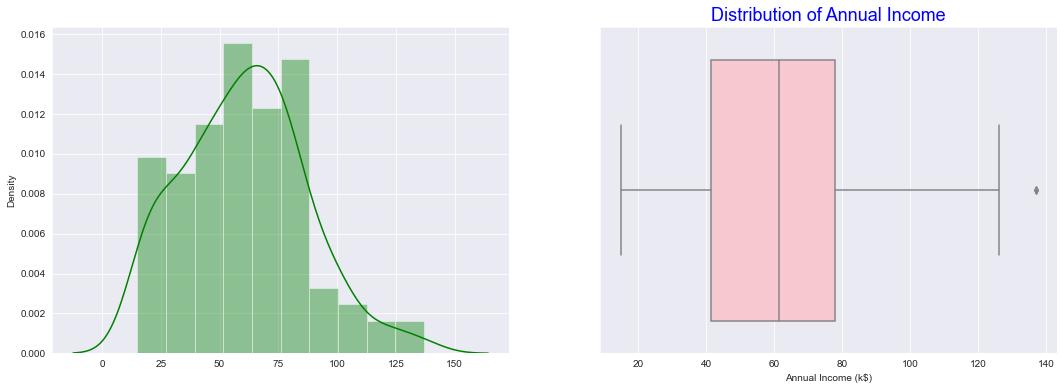

In [13]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.distplot(x=df['Annual Income (k$)'], color='green')

plt.subplot(122)
sns.boxplot(x=df['Annual Income (k$)'], color='pink')
plt.title("Distribution of Annual Income", fontsize=18, color='blue');

One outlier in Annual income column. Remove this one data point

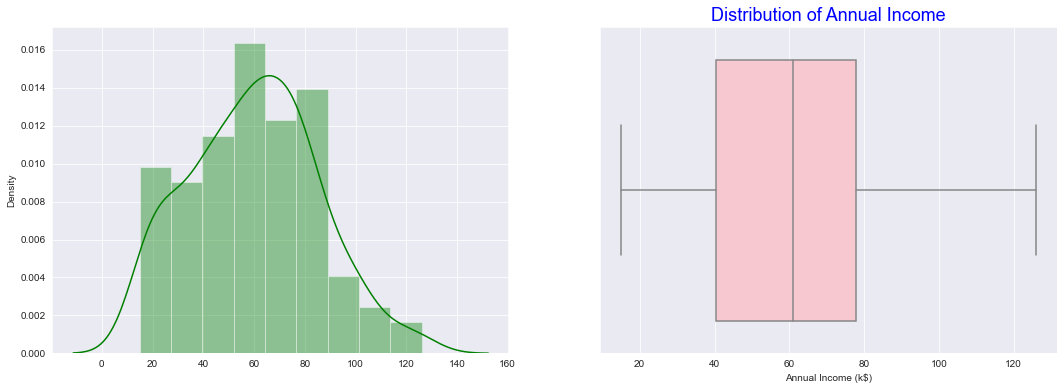

In [14]:
df=df[df['Annual Income (k$)']<130]

plt.figure(figsize=(18,6))
plt.subplot(121)
sns.distplot(x=df['Annual Income (k$)'], color='green')

plt.subplot(122)
sns.boxplot(x=df['Annual Income (k$)'], color='pink')
plt.title("Distribution of Annual Income", fontsize=18, color='blue');

### 4. Analyze Spending Score

In [15]:
df['Spending Score (1-100)'].describe()

count    198.000000
mean      50.196970
std       25.746846
min        1.000000
25%       35.000000
50%       50.000000
75%       72.750000
max       99.000000
Name: Spending Score (1-100), dtype: float64

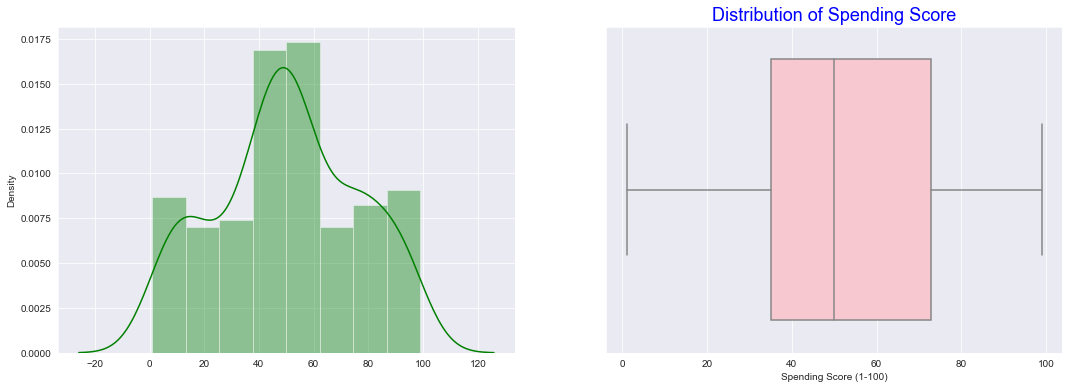

In [16]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.distplot(x=df['Spending Score (1-100)'], color='green')

plt.subplot(122)
sns.boxplot(x=df['Spending Score (1-100)'], color='pink')
plt.title("Distribution of Spending Score", fontsize=18, color='blue');

### Change Genre to Numeric

In [17]:
df['Genre']=np.where(df['Genre']=='Male', 1, 0)
df['Genre'].value_counts()

0    112
1     86
Name: Genre, dtype: int64

### Scale the features

In [18]:
data=df.drop('CustomerID', axis=1)

In [19]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
data=std_scaler.fit_transform(data)
data=pd.DataFrame(data, columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.141195,-1.425414,-1.779171,-0.435989
1,1.141195,-1.282367,-1.779171,1.199413
2,-0.876275,-1.353890,-1.739447,-1.720949
3,-0.876275,-1.139319,-1.739447,1.043661
4,-0.876275,-0.567131,-1.699723,-0.397051


In [20]:
from sklearn.decomposition import PCA
pca=PCA(2)

In [21]:
data=pca.fit_transform(data)
data.shape

(198, 2)

## Create Cluster of Customers

### 1. Using Agglomerative Clustering

In [22]:
from sklearn.cluster import AgglomerativeClustering
aglo=AgglomerativeClustering(n_clusters=2)
aglo.fit(data)

AgglomerativeClustering()

In [23]:
label=aglo.fit_predict(data)
unique_labels=np.unique(label)
print("Unique Labels=", unique_labels)

Unique Labels= [0 1]


In [24]:
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient: %0.3f" % silhouette_score(data, label, metric="sqeuclidean"))

Silhouette Coefficient: 0.443


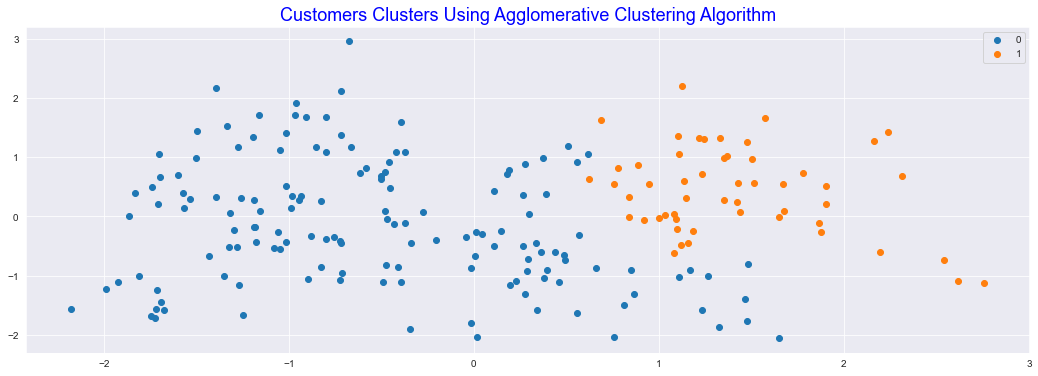

In [25]:
plt.figure(figsize=(18,6))
for i in unique_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
    plt.title("Customers Clusters Using Agglomerative Clustering Algorithm", fontsize=18, color='blue');
plt.legend()
plt.show()


### 2. Using Mini Batch Means Clustering

In [26]:
from sklearn.cluster import MiniBatchKMeans
mini=MiniBatchKMeans(n_clusters=2)
mini.fit(data)

MiniBatchKMeans(n_clusters=2)

In [27]:
label=mini.fit_predict(data)
unique_labels=np.unique(label)
centroids=mini.cluster_centers_
print("Unique Labels=", unique_labels)
print("Centroids=\n", centroids)

Unique Labels= [0 1]
Centroids=
 [[ 0.94976484 -0.12046055]
 [-1.04760455  0.13254381]]


In [28]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(data, label, metric="sqeuclidean"))

Silhouette Coefficient: 0.570


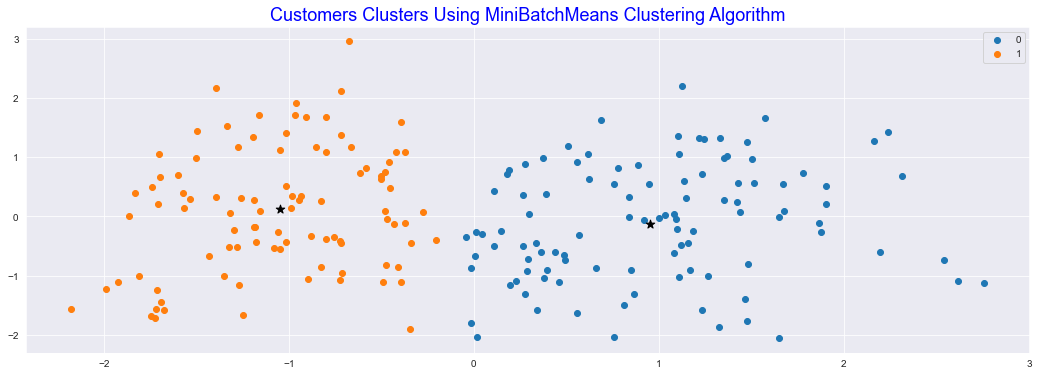

In [29]:
plt.figure(figsize=(18,6))
for i in unique_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
    plt.title("Customers Clusters Using MiniBatchMeans Clustering Algorithm", fontsize=18, color='blue');
plt.scatter(centroids[:,0], centroids[:,1], s=80, color='black', marker='*')
plt.legend()
plt.show()

### 3. Using KMeans Clustering

In [30]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(data)

KMeans(n_clusters=2)

In [31]:
label=kmeans.fit_predict(data)
unique_labels=np.unique(label)
centroids=kmeans.cluster_centers_
print("Unique Labels=", unique_labels)
print("Centroids=\n", centroids)

Unique Labels= [0 1]
Centroids=
 [[ 0.96978143 -0.10557012]
 [-1.05144724  0.11446024]]


In [32]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(data, label, metric="sqeuclidean"))

Silhouette Coefficient: 0.570


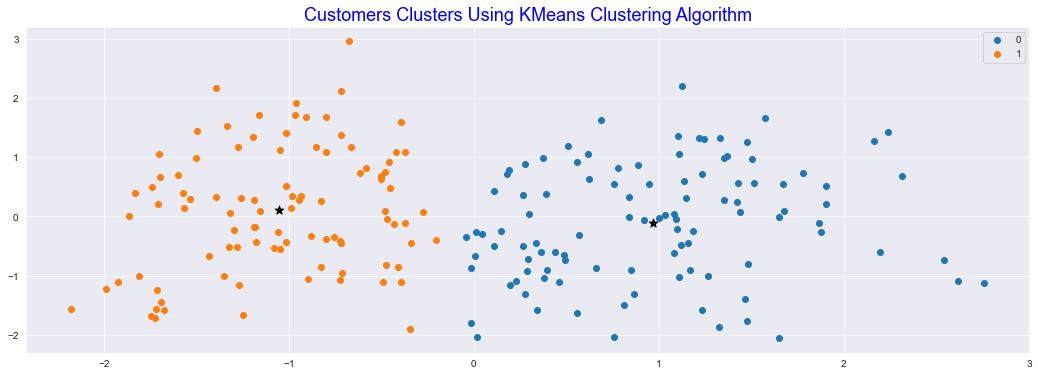

In [33]:
plt.figure(figsize=(18,6))
for i in unique_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
    plt.title("Customers Clusters Using KMeans Clustering Algorithm", fontsize=18, color='blue');
plt.scatter(centroids[:,0], centroids[:,1], s=80, color='black', marker='*')
plt.legend()
plt.show()

## Best value of K using Elbow Method

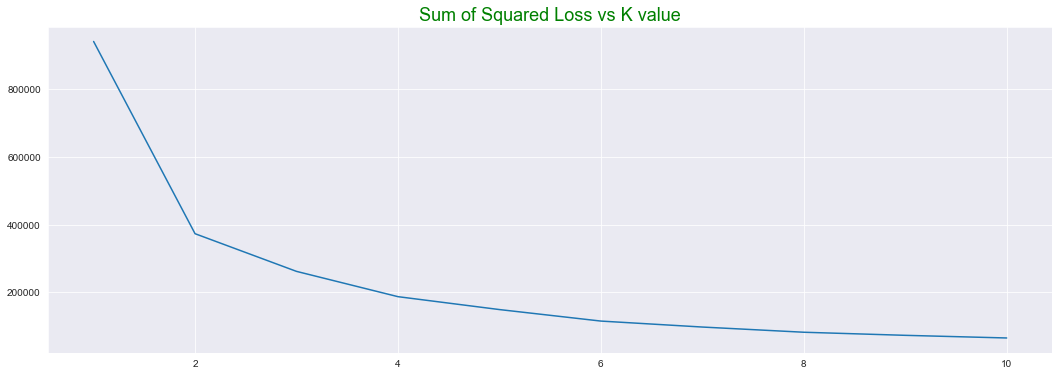

In [34]:
ssl=[]

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(df)
    ssl.append(clustering.inertia_)
    
k=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.figure(figsize=(18,6))
sns.lineplot(x=k, y=ssl);
plt.title("Sum of Squared Loss vs K value", fontsize=18, color='green');

Our data have 2 clusters.

### 4. Using Affinity Propagation Clustering

In [35]:
from sklearn.cluster import AffinityPropagation
aff=AffinityPropagation()
aff.fit(data)

AffinityPropagation()

In [36]:
n_clusters_=len(aff.cluster_centers_indices_)
print("Number of clusters=", n_clusters_)
label=aff.fit_predict(data)
unique_labels=np.unique(label)
centroids=aff.cluster_centers_
print("Unique Labels=", unique_labels)
print("Centroids=\n", centroids)

Number of clusters= 13
Unique Labels= [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Centroids=
 [[-1.69089844 -1.43911641]
 [ 2.53940632 -0.73386027]
 [ 1.23475346 -1.57637398]
 [-0.49112515 -1.10430704]
 [ 0.29412243 -0.71544826]
 [ 0.6230035   0.64157894]
 [-0.87871689 -0.32599297]
 [ 1.67120809  0.54789129]
 [-0.58399933  0.81850107]
 [ 1.18521485 -0.24455396]
 [-1.39079949  0.33307878]
 [ 1.33139587  1.32155997]
 [-0.96753827  1.71732144]]


In [37]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(data, label, metric="sqeuclidean"))

Silhouette Coefficient: 0.552


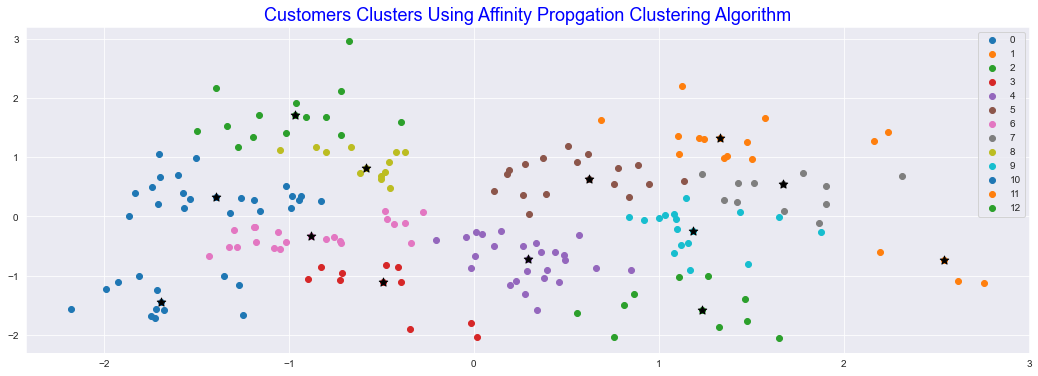

In [38]:
plt.figure(figsize=(18,6))
for i in unique_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
    plt.title("Customers Clusters Using Affinity Propgation Clustering Algorithm", fontsize=18, color='blue');
plt.scatter(centroids[:,0], centroids[:,1], s=80, color='black', marker='*')
plt.legend()
plt.show()

### 5. Using Mean Shift Clustering

In [39]:
from sklearn.cluster import MeanShift
meanshift=MeanShift(bandwidth=2)
meanshift.fit(data)

MeanShift(bandwidth=2)

In [40]:
label=meanshift.fit_predict(data)
unique_labels=np.unique(label)
centroids=meanshift.cluster_centers_
print("Unique Labels=", unique_labels)
print("Centroids=\n", centroids)

Unique Labels= [0]
Centroids=
 [[-0.02381978  0.10586078]]


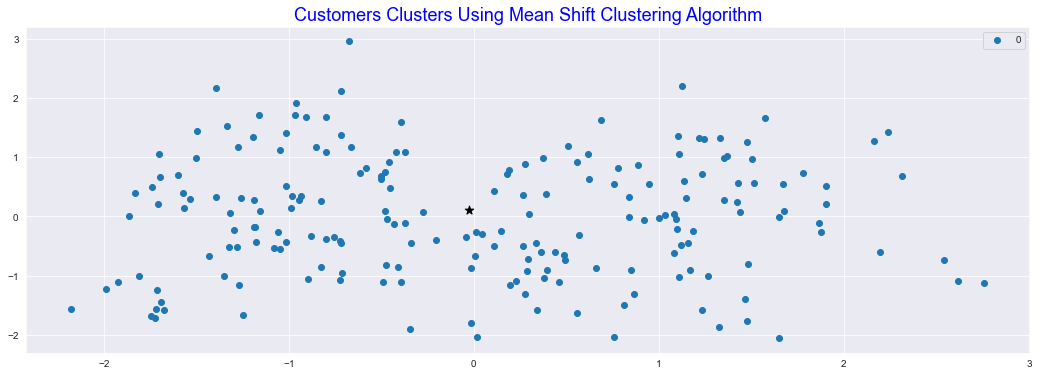

In [41]:
plt.figure(figsize=(18,6))
for i in unique_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
    plt.title("Customers Clusters Using Mean Shift Clustering Algorithm", fontsize=18, color='blue');
plt.scatter(centroids[:,0], centroids[:,1], s=80, color='black', marker='*')
plt.legend()
plt.show()